# Prueba de evaluación 2

Entornos de data science con Python
Curso 2015/16.
Parte 1
En esta primera parte trabajaremos con el API REST de 4chan:
https://github.com/4chan/4chan-API
(es conveniente tratar de comprender los campos que devuelve el JSON antes de comenzar,
siguiendo el ejemplo de clase)
Se pide lo siguiente:

• Obtener una muestra de dos boards de 4chan, sacando una instantánea concreta
(todas las páginas de cada board). Solo es necesario obtener la información requerida
para los puntos siguientes, no es necesario procesar todo.

• Contrastar diferencias en la media de respuestas por post en los dos boards elegidos.

• Obtener la distribución del tamaño de las imágenes en los posts de uno de los boards

In [35]:
# Lo primero importamos las librerias que vammos a necesitar

import requests as rq
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [36]:
# Nos bajamos la información de la Api de 4 chan

all_boards = rq.get('https://a.4cdn.org/boards.json')
print (all_boards.headers['content-type'])
print (all_boards.text[:])

application/json
{"boards":[{"board":"3","title":"3DCG","ws_board":1,"per_page":15,"pages":10,"max_filesize":4194304,"max_webm_filesize":3145728,"max_comment_chars":2000,"max_webm_duration":120,"bump_limit":310,"image_limit":150,"cooldowns":{"threads":600,"replies":60,"images":60},"meta_description":"\u0026quot;\/3\/ - 3DCG\u0026quot; is 4chan's board for 3D modeling and imagery.","is_archived":1},{"board":"a","title":"Anime \u0026 Manga","ws_board":1,"per_page":15,"pages":10,"max_filesize":4194304,"max_webm_filesize":3145728,"max_comment_chars":2000,"max_webm_duration":120,"bump_limit":500,"image_limit":250,"cooldowns":{"threads":600,"replies":60,"images":60},"meta_description":"\u0026quot;\/a\/ - Anime \u0026amp; Manga\u0026quot; is 4chan's imageboard dedicated to the discussion of Japanese animation and manga.","spoilers":1,"custom_spoilers":1,"is_archived":1},{"board":"aco","title":"Adult Cartoons","ws_board":0,"per_page":15,"pages":10,"max_filesize":4194304,"max_webm_filesize":314

In [37]:
# Lo metemos en una variable y le echamos un vistazo

boards = json.loads(all_boards.text)
boards

{'boards': [{'board': '3',
   'bump_limit': 310,
   'cooldowns': {'images': 60, 'replies': 60, 'threads': 600},
   'image_limit': 150,
   'is_archived': 1,
   'max_comment_chars': 2000,
   'max_filesize': 4194304,
   'max_webm_duration': 120,
   'max_webm_filesize': 3145728,
   'meta_description': "&quot;/3/ - 3DCG&quot; is 4chan's board for 3D modeling and imagery.",
   'pages': 10,
   'per_page': 15,
   'title': '3DCG',
   'ws_board': 1},
  {'board': 'a',
   'bump_limit': 500,
   'cooldowns': {'images': 60, 'replies': 60, 'threads': 600},
   'custom_spoilers': 1,
   'image_limit': 250,
   'is_archived': 1,
   'max_comment_chars': 2000,
   'max_filesize': 4194304,
   'max_webm_duration': 120,
   'max_webm_filesize': 3145728,
   'meta_description': "&quot;/a/ - Anime &amp; Manga&quot; is 4chan's imageboard dedicated to the discussion of Japanese animation and manga.",
   'pages': 10,
   'per_page': 15,
   'spoilers': 1,
   'title': 'Anime & Manga',
   'ws_board': 1},
  {'board': 'aco',

In [38]:
import pandas as pd
import numpy as np

#voy a construir un data frame

boardsframe = pd.DataFrame(columns=["tema", "meta_descripcion", "N_paginas", "limite_imagenes"])

def add_row(df, board):
    title = board["title"]
    metadesc = board["meta_description"]
    page = int(board["pages"])
    imagelim = int(board["image_limit"])
    
    df.loc[board["board"]] = [title,  metadesc, page,imagelim] 
    
for row in boards["boards"]:
    add_row(boardsframe, row)

# Vamos a ver como quedó. Listo lo contenido en variable
    
boardsframe  

,tema,meta_descripcion,N_paginas,limite_imagenes
3,3DCG,&quot;/3/ - 3DCG&quot; is 4chan's board for 3D...,10.0,150.0
a,Anime & Manga,&quot;/a/ - Anime &amp; Manga&quot; is 4chan's...,10.0,250.0
aco,Adult Cartoons,&quot;/aco/ - Adult Cartoons&quot; is 4chan's ...,10.0,250.0
adv,Advice,&quot;/adv/ - Advice&quot; is 4chan's board fo...,10.0,150.0
an,Animals & Nature,&quot;/an/ - Animals &amp; Nature&quot; is 4ch...,10.0,150.0
asp,Alternative Sports & Wrestling,&quot;/asp/ - Alternative Sports &amp; Wrestli...,10.0,150.0
b,Random,&quot;/b/ - Random&quot; is the birthplace of ...,10.0,150.0
biz,Business & Finance,&quot;/biz/ - Business &amp; Finance&quot; is ...,10.0,150.0
c,Anime/Cute,&quot;/c/ - Anime/Cute&quot; is 4chan's imageb...,10.0,150.0
cgl,Cosplay & EGL,&quot;/cgl/ - Cosplay &amp; EGL&quot; is 4chan...,10.0,150.0


In [39]:
# selecciono los board de travel y el de historia, porque me gustan (ninguna otra razón en especial)
# his	Yaoi	&quot;/his/ - History
# trv	Yaoi	&quot;/trv/ - Travel

board_trv= boardsframe.loc["trv"]
board_his= boardsframe.loc["his"]


In [40]:
# vemos la variable selectionada de travel

board_trv

tema                                                           Travel
meta_descripcion    &quot;/trv/ - Travel&quot; is 4chan's imageboa...
N_paginas                                                          10
limite_imagenes                                                   150
Name: trv, dtype: object

In [41]:
# vemos la variable selectionada de historia

board_his

tema                                             History & Humanities
meta_descripcion    &quot;/his/ - History &amp; Humanities&quot; i...
N_paginas                                                          10
limite_imagenes                                                   150
Name: his, dtype: object

In [42]:
# vemos que todos los bards tienen limitado a 10 páginas aunque algunos permiten mayor número de imagenes.
# por ejemplo
# vip	Yaoi	&quot;/vip/ - Very Important Posts&quot; is 4c...	10.0	300.0

# eso del limite a 10 paginas es por la naturaleza misma de 4 chan que van desapareciendo las entradas viejas.

# las de historia y travel tienen limite 10 páginas y ambos 150 imagenes de limite. 

In [43]:

# Vamos a generar una funcion para recorrer cada board, quedarme con los datos de replies (respuestas) y fsize tamaño
# esta información la almacenaremos y despues selecccionaremos aquella que corresponde a los board de historia y travel


def recorrer_board(Datos,nombre):
  
    boardReturn = pd.DataFrame(columns=["idHilo","idPost","replies", "ext", "fsize"])
    size=Datos[2].astype(np.int32) 
    numpage=0
    
    for p in range(1, size):
        page = rq.get('https://a.4cdn.org/' + nombre + '/'+ str(p) +'.json')
        contents = json.loads(page.text)
        numhilo = 0
        numpage= numpage + 1
        for trh in contents["threads"]: 
            numhilo=numhilo+1
            numpost=0
            for post in trh["posts"]:  
                numpost=numpost+1
                number = int(post["no"])
                replies = 0
                fsize = 0
                ext=""
                if ("replies" in post):
                    replies = int(post["replies"])
                if ("fsize" in post):
                    fsize = float(post["fsize"])
                    
                if ("ext" in post):
                    ext = post["ext"] 
                    
                boardReturn.loc[number] = [str(numpage)+str(numhilo), numpost,replies,ext, fsize]
    return  boardReturn  

# vamos a contar las filas y las columnas de los boards de travel e historia
# las columnas ya las sabemos de antemano porque las definimos nosotros en a funcion :o)

dt_board_trv = recorrer_board(board_trv,"trv")
print (dt_board_trv.shape)
dt_board_his= recorrer_board(board_his,"his")
print (dt_board_his.shape)

(653, 5)
(739, 5)


In [45]:
  # Tenemos en Travel 653 filas y 5 columnas
    # Tenemos en historia 739 filas y 5 columnas
    # ahora, claro, cuando lo he ejecutado. Si se vuelve a ejecutar otra este note book pues se conectara de nuevo y nos
    # dará una cifra nueva en funciónd de lo que se encuentre al contectarse a la API de 4 chan


In [46]:
# vamos a echar un vistazo a la información extraida para travel

dt_board_trv.head(5) 

,idHilo,idPost,replies,ext,fsize
609350,11,1.0,5.0,.png,49320.0
609360,11,2.0,0.0,.jpg,52786.0
1175099,12,1.0,5.0,.jpg,26973.0
1175102,12,2.0,0.0,,0.0
1175123,12,3.0,0.0,,0.0


In [47]:
# y a la de Historia

dt_board_his.head(5) 

,idHilo,idPost,replies,ext,fsize
27939,11,1.0,0.0,.jpg,2708828.0
1866293,12,1.0,10.0,.jpg,154673.0
1866362,12,2.0,0.0,,0.0
1866363,12,3.0,0.0,,0.0
1866370,12,4.0,0.0,,0.0


In [48]:
# Para Contrastar diferencias en la media de respuestas por post en los dos boards elegidos vamos a otener la media
# del valor de la columna Respuestas, es decir en base a cuantos post tenemos cuantas respuestas tiene cada unoo
# asi, si tenemos 10 post y sumamos todas las respuestas y nos da 20, pues tendremos una media de 2 respuesta por post.

In [49]:
# vamos a hacer la media de las respuestas por post en travel

media_trv=dt_board_trv["replies"].mean()
print (media_trv, " es la media de las respuestas en el board de Travel")


5.540581929555896  es la media de las respuestas en el board de Travel


In [50]:
# vamos a hacer la media de las respuestas por post en historia

media_his=dt_board_his["replies"].mean()
print (media_his, " es la media de las respuestas en el board de Historia")

5.891745602165088  es la media de las respuestas en el board de Historia


In [51]:
# por lo que vemos ruscita más interes o controversia el board de Historia. Pero muy poquito más

In [52]:
# vamos a hacer la media del tamaño de foto por post en travel

media_trv=dt_board_trv["fsize"].mean()
print (media_trv, " es la media del tamaño de foto en el board de Travel")

164809.77488514548  es la media del tamaño de foto en el board de Travel


In [53]:
# vamos a hacer la media del tamaño de foto por post en travel

media_his=dt_board_his["fsize"].mean()
print (media_his, " es la media del tamaño de foto en el board de Historia")

130175.24763193505  es la media del tamaño de foto en el board de Historia


In [54]:
# Como información exra Vamos a ver cuantos post hay en el board de travel , cuantos con respuesta y cuantos sin:

df_trv_rep = dt_board_trv['replies']
total_post_trv = len(df_trv_rep)
df_trv_aux = dt_board_trv[dt_board_trv['replies'] > 0]
df_trv_rep = df_trv_aux['replies']
num_post_0 = len(df_trv_rep)
print ("Board Travel:")
print ("- Número total de post:", total_post_trv)
print ("- Número de post sin respuesta", num_post_0)
print ("- Número de post con alguna respuesta:", (total_post_trv - num_post_0))

Board Travel:
- Número total de post: 653
- Número de post sin respuesta 124
- Número de post con alguna respuesta: 529


In [55]:
# Como información exra Vamos a ver cuantos post hay en el board de historia , cuantos con respuesta y cuantos sin:

df_his_rep = dt_board_his['replies']
total_post_his = len(df_his_rep)
df_his_aux = dt_board_his[dt_board_his['replies'] > 0]
df_his_rep = df_his_aux['replies']
num_post_0 = len(df_his_rep)
print ('Board Historia:')
print ("- Número total de post:", total_post_his)
print ("- Número de post sin respuesta", num_post_0)
print ("- Número de post con alguna respuesta:", (total_post_his - num_post_0))


Board Historia:
- Número total de post: 739
- Número de post sin respuesta 130
- Número de post con alguna respuesta: 609


In [56]:
# Para haccer un histograma del tamaño de foto vamos ha tomar los mismos datos pero quitando aquellos post que no tengan
# fotos. Para ello filtraremos en el board de historia por el fsize, tomando aquellos que sean distintos de 0

In [57]:
df_his_solo_fotos = dt_board_his[dt_board_his.fsize != 0.0]

In [58]:
df_his_solo_fotos.head(5)

,idHilo,idPost,replies,ext,fsize
27939,11,1.0,0.0,.jpg,2708828.0
1866293,12,1.0,10.0,.jpg,154673.0
1866333,13,1.0,19.0,.jpg,1174029.0
1866390,13,2.0,0.0,.jpg,72846.0
1866242,14,1.0,18.0,.jpg,14478.0


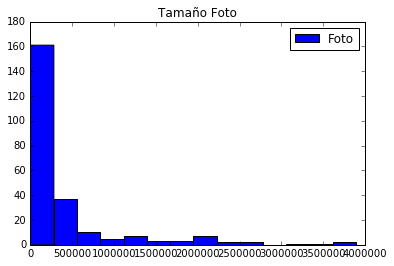

In [59]:
# una vez quitados pintamos:

import matplotlib.pyplot as plt

plt.hist(df_his_solo_fotos['fsize'], bins=14, histtype='bar', color='blue', label='Foto')
plt.title('Tamaño Foto')
plt.legend()
plt.show()

In [60]:
# misma operación de filtrado en el board de travel

df_trv_solo_fotos = dt_board_trv[dt_board_trv.fsize != 0.0]

In [ ]:
df_trv_solo_fotos.head(5)

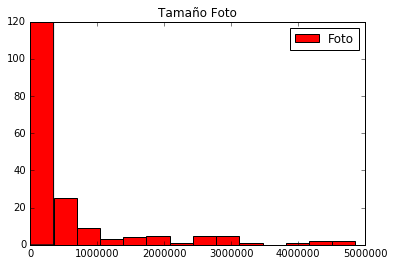

In [61]:
plt.hist(df_trv_solo_fotos['fsize'], bins=14, histtype='bar', color='red', label='Foto')
plt.title('Tamaño Foto')
plt.legend()
plt.show()

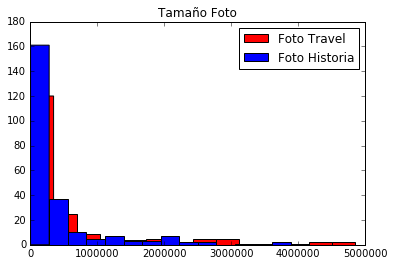

In [64]:
# Ponemos los dos grafcos para comparlos mejor

import matplotlib.pyplot as plt

plt.hist(df_trv_solo_fotos['fsize'], bins=14, histtype='bar', color='red', label='Foto Travel')
plt.hist(df_his_solo_fotos['fsize'], bins=14, histtype='bar', color='blue', label='Foto Historia')
plt.title('Tamaño Foto')
plt.legend()
plt.show()

In [65]:
# nos llama mucho la atención la escala , el eje X, de los grafico por eso vamos a ver si tenemos poutliers o valores 
# que sobre salen mucho

In [66]:
outlier = dt_board_trv[dt_board_trv.fsize >= 4000000]

In [67]:
# outlier de Travel
outlier

,idHilo,idPost,replies,ext,fsize
1174982,14,1.0,10.0,.jpg,4080813.0
1166452,114,1.0,221.0,.jpg,4397395.0
1174741,310,1.0,2.0,.jpg,4855933.0
1173983,41,1.0,21.0,.jpg,4476925.0
1172528,89,1.0,12.0,.png,4660580.0


In [68]:
outlier_his = dt_board_his[dt_board_his.fsize >= 4000000]

In [69]:
# outlier de historia
outlier_his

,idHilo,idPost,replies,ext,fsize


In [74]:
# dados estos resultado vemos que el fichero mas grande de trv es de 7,5 MB y el de historia de 4 MB aprox

# por eso vamos a hacer una comprobacion del tamaño maximo de fichero en cada uno de esos boards




boardsframe = pd.DataFrame(columns=["tema", "meta_descripcion", "N_paginas", "limite_imagenes", "Tamaño Máximo"])

def add_row(df, board):
    title = board["title"]
    metadesc = board["meta_description"]
    page = int(board["pages"])
    imagelim = int(board["image_limit"])
    max_filesize = int(board["max_filesize"])  
    
    df.loc[board["board"]] = [title,  metadesc, page,imagelim, max_filesize] 
    
for row in boards["boards"]:
    add_row(boardsframe, row)


boardsframe

,tema,meta_descripcion,N_paginas,limite_imagenes,Tamaño Máximo
3,3DCG,&quot;/3/ - 3DCG&quot; is 4chan's board for 3D...,10.0,150.0,4194304.0
a,Anime & Manga,&quot;/a/ - Anime &amp; Manga&quot; is 4chan's...,10.0,250.0,4194304.0
aco,Adult Cartoons,&quot;/aco/ - Adult Cartoons&quot; is 4chan's ...,10.0,250.0,4194304.0
adv,Advice,&quot;/adv/ - Advice&quot; is 4chan's board fo...,10.0,150.0,4194304.0
an,Animals & Nature,&quot;/an/ - Animals &amp; Nature&quot; is 4ch...,10.0,150.0,4194304.0
asp,Alternative Sports & Wrestling,&quot;/asp/ - Alternative Sports &amp; Wrestli...,10.0,150.0,4194304.0
b,Random,&quot;/b/ - Random&quot; is the birthplace of ...,10.0,150.0,2097152.0
biz,Business & Finance,&quot;/biz/ - Business &amp; Finance&quot; is ...,10.0,150.0,4194304.0
c,Anime/Cute,&quot;/c/ - Anime/Cute&quot; is 4chan's imageb...,10.0,150.0,4194304.0
cgl,Cosplay & EGL,&quot;/cgl/ - Cosplay &amp; EGL&quot; is 4chan...,10.0,150.0,4194304.0


In [75]:
# Ahi vemos la diferencia y por eso que nos salgan esas escalas

# trv	Yaoi	&quot;/trv/ - Travel&quot; is 4chan's imageboa...	10.0	150.0	8388608.0

# his	Yaoi	&quot;/his/ - History &amp; Humanities&quot; i...	10.0	150.0	4194304.0


In [76]:
# La mayoriia de las imagenes ocupan menos de un mega pero como las hay de hasta 7,5 MB pues asi se ve 
# la distribuición

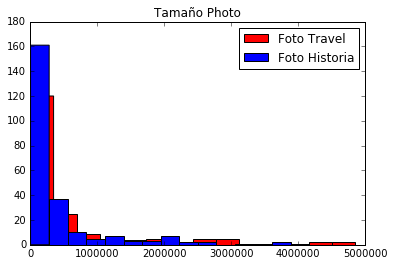

In [78]:
plt.hist(df_trv_solo_fotos['fsize'], bins=14, histtype='bar', color='red', label='Foto Travel')
plt.hist(df_his_solo_fotos['fsize'], bins=14, histtype='bar', color='blue', label='Foto Historia')
plt.title('Tamaño Photo')
plt.legend()
plt.show()